In [1]:
import os
import random
from alm.node import node as nd
from alm.comparator import extracting_subtree as es

os.chdir("/alm")

In [2]:
def gen_subtree(node: nd.Node, depth: int, id_list: list):
    if depth > 2:
        return

    if len(id_list) <= 0:
        return
    
    for i in range(random.randint(1, 3)):
        child_id = id_list[0]
        id_list = id_list[1:]
        child_node = nd.Node(child_id, [], False)
        gen_subtree(child_node, depth + 1, id_list)
        node.children.append(child_node)
    
    return

In [3]:
subtrees1 = []
for i in range(100):
    id_list = random.sample(list(range(2, 14)), 12)
    node = nd.Node(id_list[0], [], False)
    gen_subtree(node, 1, id_list)
    subtrees1.append(node)

subtrees2 = []
for i in range(100):
    id_list = random.sample(list(range(2, 14)), 12)
    node = nd.Node(id_list[0], [], False)
    gen_subtree(node, 1, id_list)
    subtrees2.append(node)

# 全ての部分木を抽出した場合

In [4]:
def calc_tree_similarity_by_all_subtree(subtree1, subtree2):
    all_subtree1 = {}
    es.extract_subtree(subtree1, all_subtree1)
    all_subtree2 = {}
    es.extract_subtree(subtree2, all_subtree2)

    all_subtree_list1 = []
    for value in all_subtree1.values():
        all_subtree_list1.extend(value)
    all_subtree_list2 = []
    for value in all_subtree2.values():
        all_subtree_list2.extend(value)
        
    matched_cnt = 0
    for value1 in all_subtree_list1:
        for value2 in all_subtree_list2:
            if value1.to_dict() == value2.to_dict():
                matched_cnt += 1
    return matched_cnt / min(len(all_subtree_list1), len(all_subtree_list2))

In [5]:
all_subtree = []
for i in range(len(subtrees1)):
    tree_similarity = calc_tree_similarity_by_all_subtree(subtrees1[i], subtrees2[i])
    all_subtree.append(tree_similarity)

print(all_subtree)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.0, 0.018518518518518517, 0.06666666666666667, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.14285714285714285, 0.26666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0023752969121140144, 0.0, 0.0, 0.0]


# 親子関係のみ抽出した場合

In [6]:
def calc_tree_similarity_by_parent_child(subtree1, subtree2):
    parent_child1 = es.extract_parent_child(subtree1)
    parent_child2 = es.extract_parent_child(subtree2)

    matched_cnt = 0
    for value1 in parent_child1:
        for value2 in parent_child2:
            if value1["id"] == value2["id"] and value1["child"] == value2["child"]:
                matched_cnt += 1
    return matched_cnt / min(len(parent_child1), len(parent_child2))

In [7]:
parent_child = []
for i in range(len(subtrees1)):
    tree_similarity = calc_tree_similarity_by_parent_child(subtrees1[i], subtrees2[i])
    parent_child.append(tree_similarity)

print(parent_child)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.14285714285714285, 0.25, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.8333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0]


# 兄弟関係も考慮した場合

In [8]:
def calc_tree_similarity_by_brothers(subtree1, subtree2):
    subtree_list1 = es.extract_parent_brothers(subtree1)
    subtree_list2 = es.extract_parent_brothers(subtree2)

    matched_cnt = 0
    for value1 in subtree_list1:
        for value2 in subtree_list2:
            if value1.to_dict() == value2.to_dict():
                matched_cnt += 1
    
    return matched_cnt / min(len(subtree_list1), len(subtree_list2))

In [9]:
brothers = []
for i in range(len(subtrees1)):
    tree_similarity = calc_tree_similarity_by_brothers(subtrees1[i], subtrees2[i])
    brothers.append(tree_similarity)

print(brothers)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.07692307692307693, 0.125, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.041666666666666664, 0.0, 0.0, 0.0]


<Axes: ylabel='Count'>

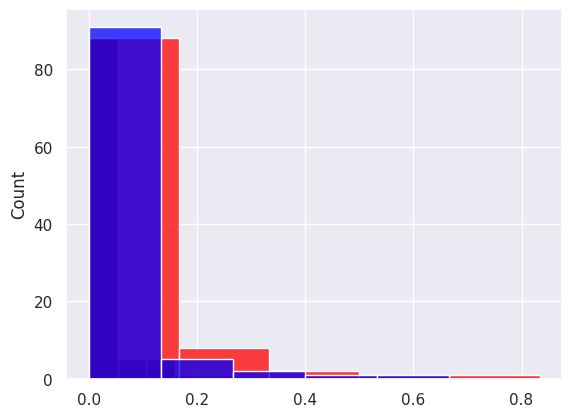

In [11]:
import seaborn as sns
sns.set()

sns.histplot(all_subtree, bins=5, color="black")
sns.histplot(parent_child, bins=5, color="red")
sns.histplot(brothers, bins=5, color="blue")